In [1]:
import json
import pandas as pd
from pandas import DataFrame

In [2]:
#loading the  dataset
with open ("C:/Users/Aakash Sadaphule/Desktop/Untitled Folder/archive/MMHS150K_GT.json") as f:
    data = json.load(f)

In [3]:
data=pd.DataFrame.from_dict(data)
data=data.T
data=data.reset_index()
data.rename(columns={"index":"user_id"},inplace=True)

In [4]:
print('No. of rows: {} and columns are: {}'.format(data.shape[0],data.shape[1]))
data.head()

No. of rows: 149823 and columns are: 6


,user_id,img_url,labels,tweet_url,tweet_text,labels_str
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
1,1063020048816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2,1108927368075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
3,1114558534635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
4,1035252480215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"


In [5]:
#importing packages for data preporcessing
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to C:\Users\Aakash
[nltk_data]     Sadaphule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\Aakash
[nltk_data]     Sadaphule\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aakash
[nltk_data]     Sadaphule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data preporcessing 

In [6]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    stop_words = stopwords.words('english')
    stop_words.remove('not')
    text_data = []
    for tweet in data:
      review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
      review = re.sub('RT', ' ', review)
      review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
      review = re.sub(r"https?", " ", review)
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = review.lower()
      review = review.split()
      porter_stemmer = PorterStemmer()
      review = [porter_stemmer.stem(word) for word in review if not word in set(stop_words) if len(word) > 2]
      review = ' '.join(review)
      text_data.append(review)

    return np.array(text_data)

In [8]:
text_data = preprocessing(data['tweet_text'])
text_data

array(['nigga', 'hors retard',
       'nigga momma youngboy spit real shit nigga', ...,
       'nigga big shitti',
       'say nigga rich amp said anger mmph lhhni lhhnyreunion',
       'nigga joe budden said thano got galact ass'], dtype='<U110')

In [9]:
Nd = data.copy()
Nd['labels'].value_counts
new_label = []
for x in Nd['labels'].values:
    new_label.append(x[0])
    
Nd['new_label'] = new_label
Nd['new_label']

0         4
1         5
2         0
3         1
4         1
         ..
149818    2
149819    0
149820    0
149821    1
149822    0
Name: new_label, Length: 149823, dtype: int64

# TF-IDF

In [11]:
#reading the dataset
dataset_path = 'C:/Users/Aakash Sadaphule/Desktop/Untitled Folder/archive/MMHS150K_GT.json'
with open(dataset_path, 'r') as f:
  hs_data = json.loads(f.read())

In [12]:
to_label = lambda labels_list: [0 if x == 0 else 1 for x in labels_list]
label = lambda labels_list: [0 if x == 0 else 1 for x in labels_list]
flattened = [[key, val['tweet_text'], 1 if sum(to_label(val['labels'])) ==3 else 0] 
             for key, val in hs_data.items()]
flattened[:10]

[['1114679353714016256', '@FriskDontMiss Nigga https://t.co/cAsaLWEpue', 1],
 ['1063020048816660480', 'My horses are retarded https://t.co/HYhqc6d5WN', 1],
 ['1108927368075374593',
  '“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SHIT NIGGA” https://t.co/UczofqHrLq',
  0],
 ['1114558534635618305',
  'RT xxSuGVNGxx: I ran into this HOLY NIGGA TODAY 😭😭😭😭 https://t.co/Wa6Spl9kIw',
  0],
 ['1035252480215592966',
  '“EVERYbody calling you Nigger now!” https://t.co/6mguJ6KIBF',
  0],
 ['1106978219654303744',
  '“ real ass bitch give a fuck boutta nigga” https://t.co/YtyXf52oGi',
  0],
 ['1113920043568463874',
  '@WhiteHouse @realDonaldTrump Fuck ice. White supremacist trash. All of you are racist garbage. https://t.co/o2OB4yUnex',
  1],
 ['1114588617693966336', 'Day’s a cunt https://t.co/Ie6QZReHsw', 0],
 ['1045809514740666370', '#sissy faggot https://t.co/bm1nk8HcYO', 0],
 ['1108178453910695936', '@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1', 0]]

In [13]:
import numpy
HD = numpy.array(flattened)
HD = flattened
HD[:10]

[['1114679353714016256', '@FriskDontMiss Nigga https://t.co/cAsaLWEpue', 1],
 ['1063020048816660480', 'My horses are retarded https://t.co/HYhqc6d5WN', 1],
 ['1108927368075374593',
  '“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SHIT NIGGA” https://t.co/UczofqHrLq',
  0],
 ['1114558534635618305',
  'RT xxSuGVNGxx: I ran into this HOLY NIGGA TODAY 😭😭😭😭 https://t.co/Wa6Spl9kIw',
  0],
 ['1035252480215592966',
  '“EVERYbody calling you Nigger now!” https://t.co/6mguJ6KIBF',
  0],
 ['1106978219654303744',
  '“ real ass bitch give a fuck boutta nigga” https://t.co/YtyXf52oGi',
  0],
 ['1113920043568463874',
  '@WhiteHouse @realDonaldTrump Fuck ice. White supremacist trash. All of you are racist garbage. https://t.co/o2OB4yUnex',
  1],
 ['1114588617693966336', 'Day’s a cunt https://t.co/Ie6QZReHsw', 0],
 ['1045809514740666370', '#sissy faggot https://t.co/bm1nk8HcYO', 0],
 ['1108178453910695936', '@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1', 0]]

In [14]:
!pip install sklearn

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
def vectorizer(text_data) -> list:
    vectorizer = TfidfVectorizer(
        analyzer="word",
        tokenizer=None,
        preprocessor=None,
        stop_words=stopwords.words('english'),
        strip_accents="ascii",
        token_pattern="^[a-zA-Z0-9_][a-zA-Z0-9_][a-zA-Z0-9_]*",
        sublinear_tf=True, 
        min_df=5, 
        norm='l2', 
        encoding='latin-1', 
        ngram_range=(1, 2),
        max_features=1000
    )

    train_data_features = vectorizer.fit_transform(text_data)
    print(f'vocabulary: {vectorizer.vocabulary_}')
    print(f'vocabulary size is {len(vectorizer.vocabulary_)}')

    return train_data_features

In [17]:
numpy_data = np.array(HD)
features = numpy_data[:,1]
labels = numpy_data[:,2]
vectorized = vectorizer(features)
vectorized.shape

vocabulary: {'nigga': 589, 'rt': 695, 'everybody': 260, 'days': 208, 'im': 431, 'dat': 203, 'fuck': 314, 'look': 522, 'happy': 373, 'stfu': 798, 'hes': 391, 'cardi': 141, 'broke': 124, 'funniest': 321, 'big': 90, 'sjws': 746, 'thats': 845, 'like': 493, 'wanna': 930, 'free': 307, 'right': 690, 'something': 765, 'faggot': 274, 'proud': 656, 'jason': 449, 'yes': 984, 'stupid': 810, 'surrender': 820, 'van': 918, 'quick': 664, 'watch': 934, 'lmao': 503, 'youtube': 997, 'redneck': 678, 'say': 705, 'aint': 25, 'white': 950, 'break': 119, 'man': 537, 'hol': 401, 'full': 319, 'god': 345, 'nip': 593, 'live': 502, 'wow': 975, 'clean': 162, 'yall': 978, 'father': 278, 'ugh': 906, 'click': 163, 'sold': 761, 'new': 583, 'dropped': 238, 'get': 333, 'whats': 946, 'guess': 362, 'bde': 78, 'really': 676, 'real': 673, 'via': 919, 'keep': 461, 'beautiful': 80, 'dudes': 240, 'swear': 821, 'wtf': 976, 'michael': 555, 'someone': 764, 'censored': 148, 'another': 47, 'wen': 941, 'sad': 700, 'birthday': 93, 'he

(149823, 1000)

# Neural Network

In [18]:
from sklearn.model_selection import train_test_split
X = vectorized
y = labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

# clf = MultinomialNB().fit(X_train, y_train)
clf = MLPClassifier(solver='sgd', 
                    alpha=1e-5,
                    hidden_layer_sizes=(30,), 
                    random_state=2)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30,), random_state=2,
              solver='sgd')

# Report metrics like precision, recall, F1-score, RUC curve.

In [20]:
from sklearn.metrics import accuracy_score
results = clf.predict(X_test)
accuracy = accuracy_score(y_test, results)
print("Accuracy score is: %.4f\n" % accuracy)

Accuracy score is: 0.9427



In [31]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, results, pos_label= 1, average= 'weighted')
print('Precision value is: %.3f\n' % precision)

Precision value is: 0.889



In [33]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, results, pos_label= 1,average= 'micro')
print('Recall value is : %.3f\n' % recall)

Recall value is : 0.943



In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, results, pos_label= 'positive',average= 'weighted')
print('F1 score is : %.3f\n' % f1)

F1 score is : 0.915



In [35]:
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


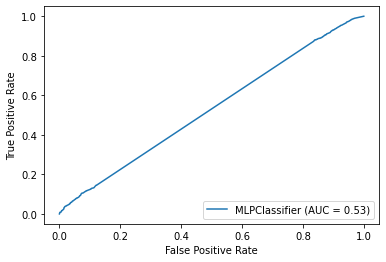

In [42]:
#ROC-AUC Chart
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()